# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

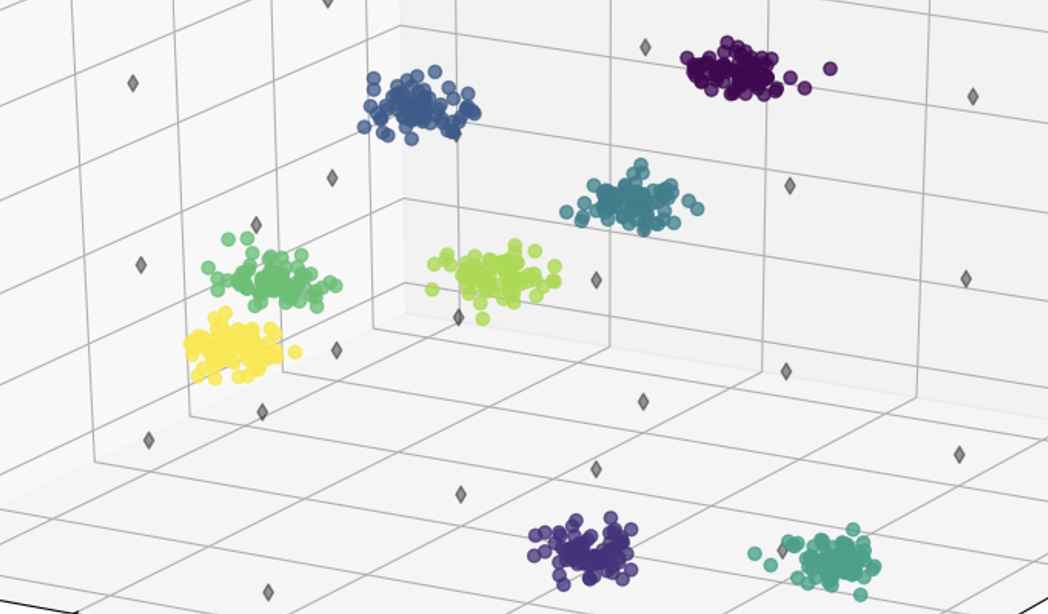

In [1293]:
samples = 500
centroid_1 = [2, 4]
centroid_2 = [7, 6]
cov = [[0.8, 0], [0, 0.8]]

In [1294]:
data_class_1 = np.random.multivariate_normal(centroid_1, cov, samples)

In [1295]:
data_class_2 = np.random.multivariate_normal(centroid_2, cov, samples)

In [1296]:
class_1 = pd.DataFrame(data_class_1, columns=['x', 'y'])
class_1['class'] = 1

In [1297]:
class_2 = pd.DataFrame(data_class_2, columns=['x', 'y'])
class_2['class'] = 2

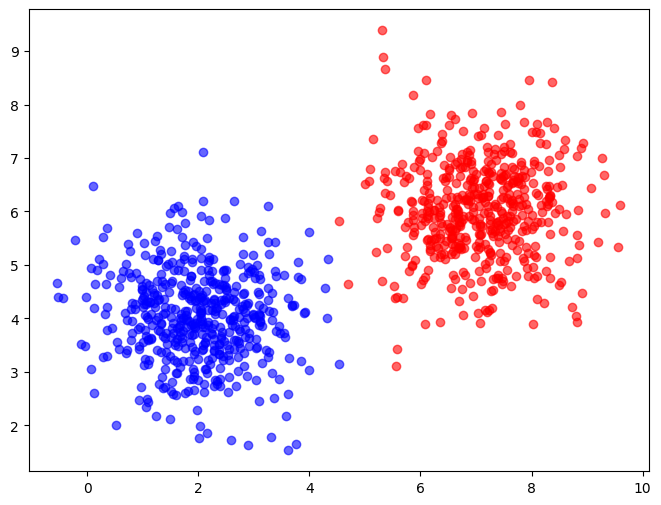

In [1298]:
plt.figure(figsize=(8, 6))
plt.scatter(data_class_1[:, 0], data_class_1[:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(data_class_2[:, 0], data_class_2[:, 1], color='red', label='Class 2', alpha=0.6)

In [1299]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [1300]:
dft1 = pd.concat([class_1, class_2])
X = dft1[['x', 'y']]
y = dft1['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

/Users/mykhailonyskohuz/Projects/ad/2/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



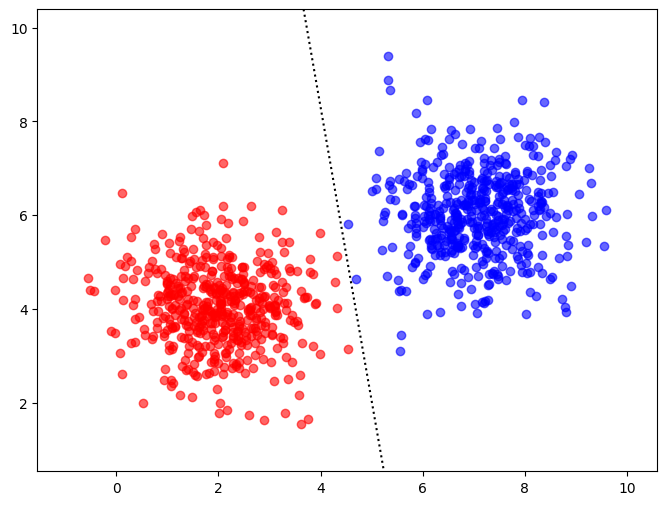

In [1301]:
plt.figure(figsize=(8, 6))
plt.scatter(data_class_1[:, 0], data_class_1[:, 1], color='red', label='Class 1', alpha=0.6)
plt.scatter(data_class_2[:, 0], data_class_2[:, 1], color='blue', label='Class 2', alpha=0.6)

xx, yy = np.meshgrid(np.linspace(X['x'].min()-1, X['x'].max()+1, 100),
                     np.linspace(X['y'].min()-1, X['y'].max()+1, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linestyles=['dotted'], colors='black')

plt.show()

In [1302]:
dft1.to_csv('lin_diff.csv', index=False)

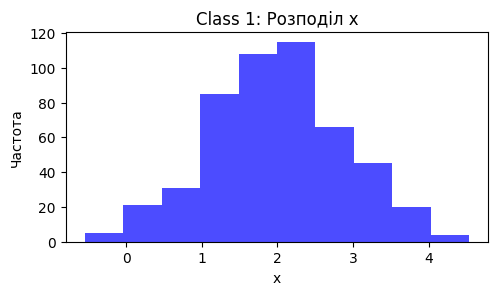

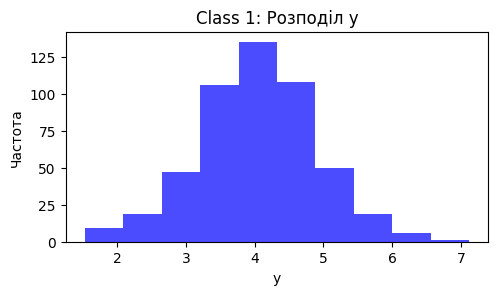

In [1303]:
features = ['x', 'y']

for feature in features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 2, 1)
    plt.hist(class_1[feature], bins=10, color='blue', alpha=0.7)
    plt.title(f'Class 1: Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.show()


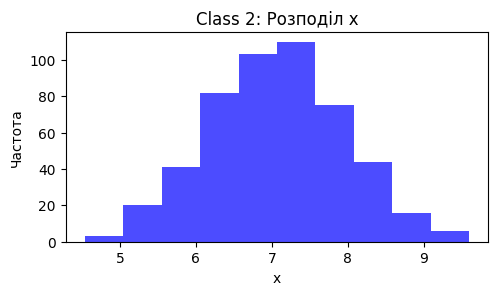

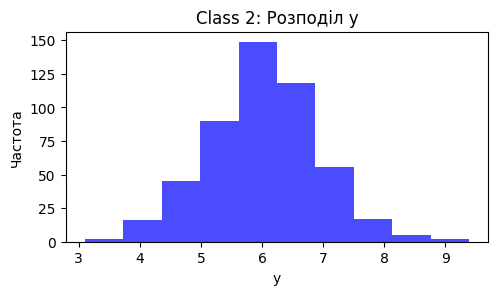

In [1304]:

for feature in features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 2, 1)
    plt.hist(class_2[feature], bins=10, color='blue', alpha=0.7)
    plt.title(f'Class 2: Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')


## Висновок
Я створив 2 класи даних за допомогою гаусового розподілу. Розкид даних заданий матрицицею коваріації і відстань між центроїдами налаштовані так щоб класи не перетинались. Лінія згенерована за допомогою методу опорних векторів. Розподіли даних нормальні бо ми використовуємо гаусовий розподіл.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

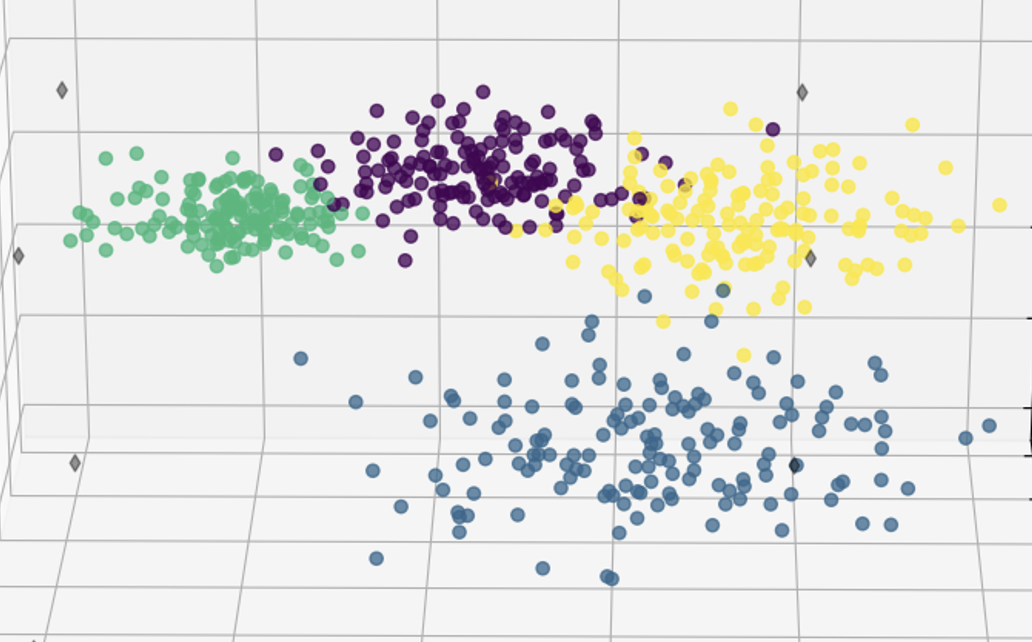

In [1305]:
samples = 300
centroid_1 = [2, 4]
centroid_2 = [7, 6]
centroid_3 = [5, 2]
cov = [[1, 0], [0, 1]]

In [1306]:
data_class_1 = np.random.multivariate_normal(centroid_1, cov, samples)
data_class_2 = np.random.multivariate_normal(centroid_2, cov, samples)
data_class_3 = np.random.multivariate_normal(centroid_3, cov, samples)

In [1307]:
class_1 = pd.DataFrame(data_class_1, columns=['x', 'y'])
class_1['class'] = 1
class_2 = pd.DataFrame(data_class_1, columns=['x', 'y'])
class_2['class'] = 3
class_3 = pd.DataFrame(data_class_1, columns=['x', 'y'])
class_3['class'] = 3

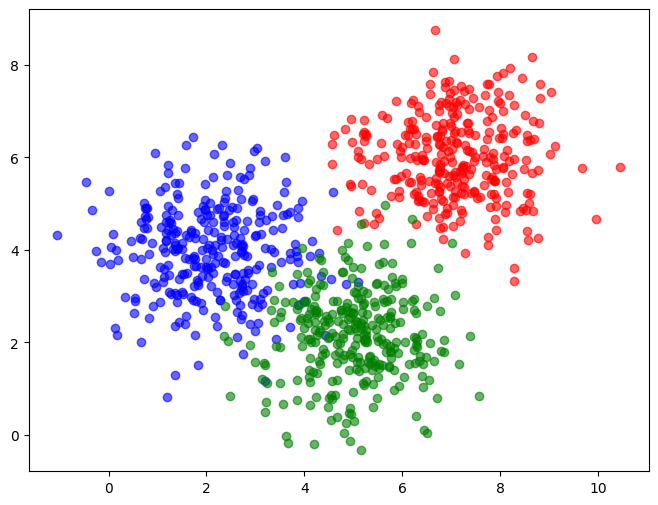

In [1308]:
plt.figure(figsize=(8, 6))
plt.scatter(data_class_1[:, 0], data_class_1[:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(data_class_2[:, 0], data_class_2[:, 1], color='red', label='Class 2', alpha=0.6)
plt.scatter(data_class_3[:, 0], data_class_3[:, 1], color='green', label='Class 3', alpha=0.6)

In [1309]:
from scipy.spatial.distance import cdist

dft2 = pd.concat([class_1, class_2, class_3], ignore_index=True)


distances_to_centroids = pd.DataFrame({
    'to_center_1': cdist(dft2[['x', 'y']], [centroid_1]).flatten(),
    'to_center_2': cdist(dft2[['x', 'y']], [centroid_2]).flatten(),
    'to_center_3': cdist(dft2[['x', 'y']], [centroid_3]).flatten()
})

dft2 = pd.concat([dft2, distances_to_centroids], axis=1)

threshold = 2.25

dft2['in_overlap'] = ((dft2['to_center_1'] < threshold) & (dft2['to_center_2'] < threshold)) | \
                   ((dft2['to_center_2'] < threshold) & (dft2['to_center_3'] < threshold)) | \
                   ((dft2['to_center_1'] < threshold) & (dft2['to_center_3'] < threshold))

overlap_fraction = dft2['in_overlap'].mean()

print(f"Частка точок в зоні перекриття: {overlap_fraction:.2%}")

Частка точок в зоні перекриття: 5.67%


In [1310]:
dft2 = dft2[['x', 'y', 'class']]
dft2.to_csv('overlaping.csv')

## Висновок
Я створив 3 класи даних за допомогою гаусового розподілу. Параметри підібрані так щоб класи перетинались. Розподіли даних тут теж нормальні бо я використовую гаусовий розподіл. Ми знаходимо відстань кожної точки до кожного центроїда і якщо відстань до 2 центроїдів менша за визначений параметр тоді ця точка знаходиться в зоні перекриття.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

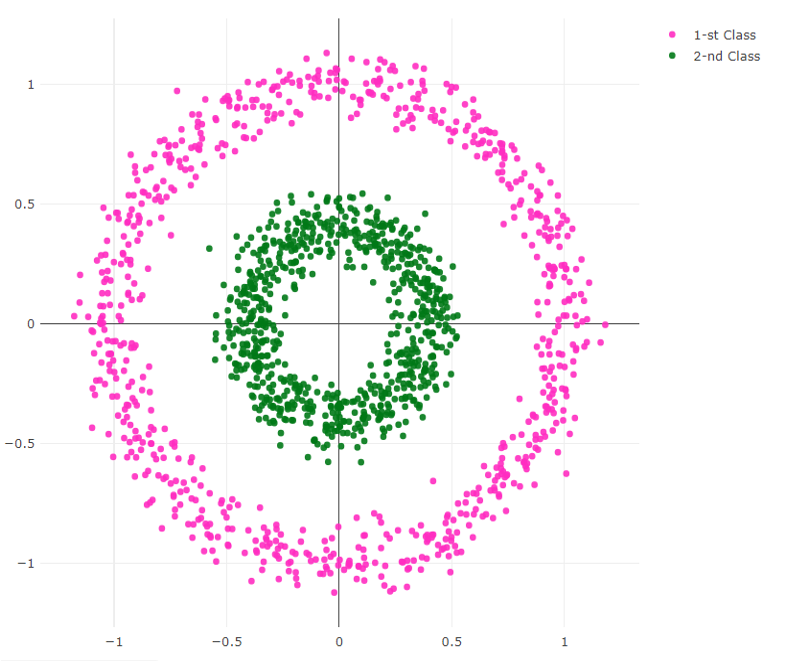

In [1311]:
R = 4
r = 2
R2 = 11
r2 = 2
n = 500

In [1312]:
theta = np.random.uniform(0, 2 * np.pi, n)
phi = np.random.uniform(0, 2 * np.pi, n)

x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)

class_1_t3 = pd.DataFrame({'x': x, 'y': y, 'class': 1})

theta = np.random.uniform(0, 2 * np.pi, n)
phi = np.random.uniform(0, 2 * np.pi, n)

x = (R2 + r2 * np.cos(phi)) * np.cos(theta)
y = (R2 + r2 * np.cos(phi)) * np.sin(theta)

class_2_t3 = pd.DataFrame({'x': x, 'y': y, 'class': 2})

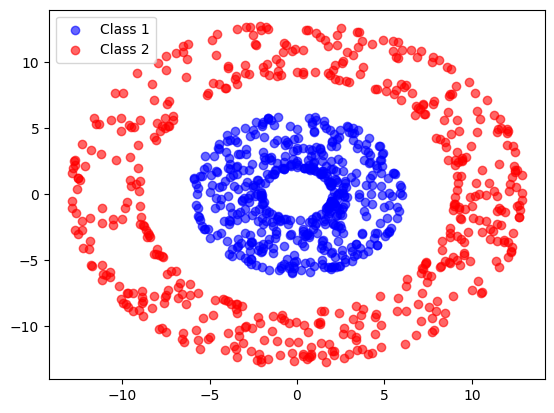

In [1313]:
plt.scatter(class_1_t3['x'], class_1_t3['y'], color='blue', label='Class 1', alpha=0.6)
plt.scatter(class_2_t3['x'], class_2_t3['y'], color='red', label='Class 2', alpha=0.6)

plt.legend()
plt.show()


In [1314]:
dft3 = pd.concat([class_1_t3, class_2_t3], ignore_index=True)

In [1315]:
(dft3)

x          y  class
0    1.929011  -0.560956      1
1    3.107437  -4.009593      1
2    2.259481  -5.504479      1
3   -1.011309  -5.797392      1
4    2.436320   4.890057      1
..        ...        ...    ...
995  3.513349  11.158669      2
996  6.576434   7.691554      2
997 -2.405238  11.393343      2
998 -2.358361  11.318062      2
999 -0.068715  -9.738659      2

[1000 rows x 3 columns]

In [1316]:
dft3.to_csv('thor_in_thor.csv', index=False)

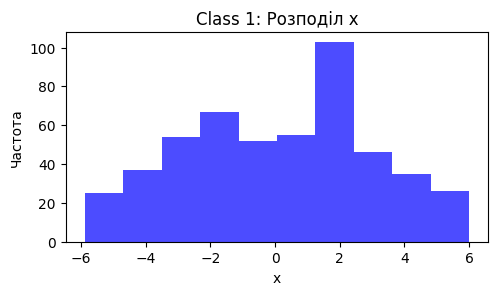

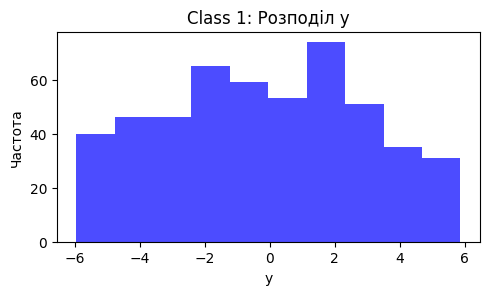

In [1317]:
features = ['x', 'y']

for feature in features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 2, 1)
    plt.hist(class_1_t3[feature], bins=10, color='blue', alpha=0.7)
    plt.title(f'Class 1: Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.show()

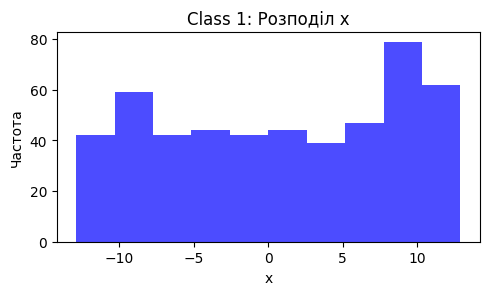

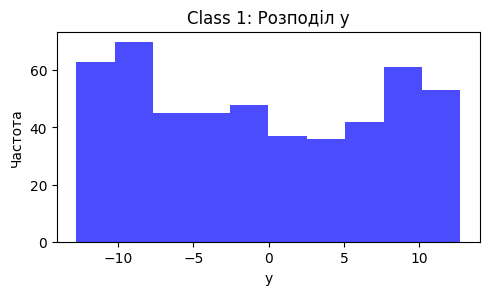

In [1318]:
for feature in features:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 2, 1)
    plt.hist(class_2_t3[feature], bins=10, color='blue', alpha=0.7)
    plt.title(f'Class 1: Розподіл {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.show()

## Висновок
Спочатку отриманий азимут і полярний кут. Далі використовуючи різні параметри генеруємо точки які утворюють 2 тори. Розподіл класів є багатомодальним це говорить про те що у даних присутні кілька груп значень з підвищеною частотою.


**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

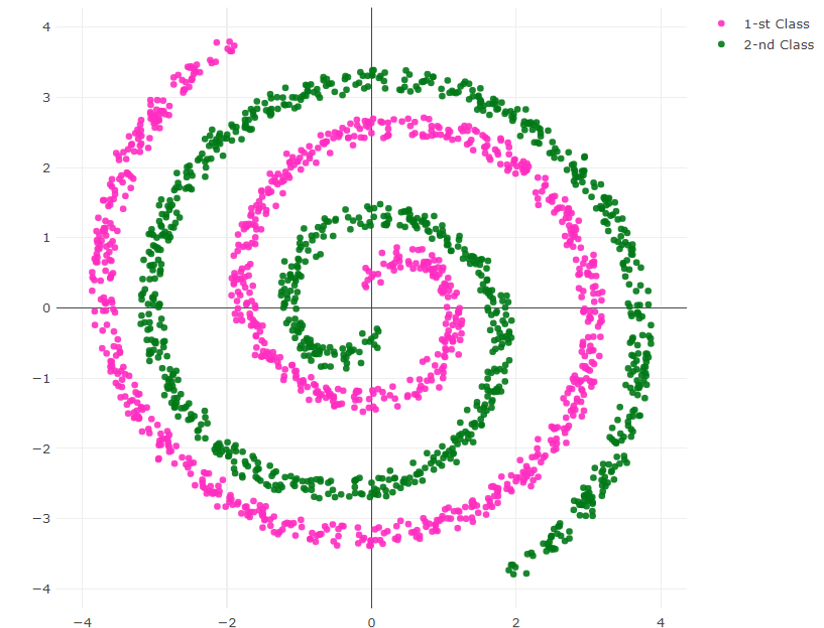

In [1319]:
noise_level = 0.2
n = 500
t = np.linspace(1, 4 * np.pi, n)

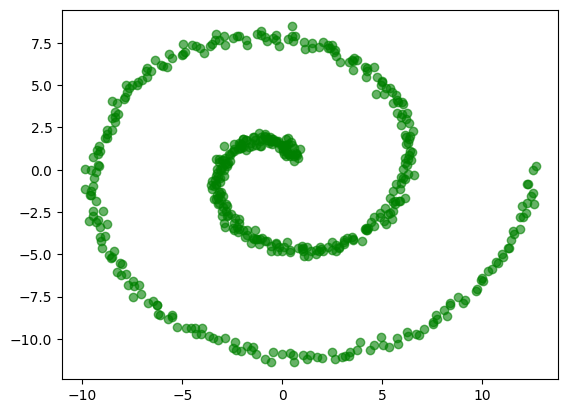

In [1320]:
s1 = t
x1 = s1 * np.cos(t) + np.random.normal(0, noise_level, n)
y1 = s1 * np.sin(t) + np.random.normal(0, noise_level, n)
class_1 = np.ones(n)
plt.scatter(x1, y1, color='green', label='Class 1', alpha=0.6)

plt.show()

s1 = t
x1 = s1 * np.cos(t) + np.random.normal(0, noise_level, n)
y1 = s1 * np.sin(t) + np.random.normal(0, noise_level, n)
class_1 = np.ones(n)

In [1321]:
s2 = -t
x2 = s2 * np.cos(t) + np.random.normal(0, noise_level, n)
y2 = s2 * np.sin(t) + np.random.normal(0, noise_level, n)
class_2 = np.ones(n)

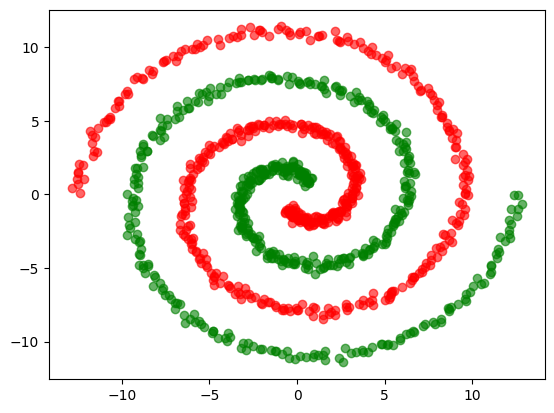

In [1322]:
plt.scatter(x1, y1, color='green', label='Class 1', alpha=0.6)
plt.scatter(x2, y2, color='red', label='Class 1', alpha=0.6)
plt.show()

In [1323]:
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
classes = np.concatenate([class_1, class_2])

dt4 = pd.DataFrame({'x': x, 'y': y, 'class': classes})

dt4.to_csv('doble_spiral.csv')

## Висновок
Спочатку ми сворюємо theta яка треба для закручування спіралі. Перше значееня там 1 щоб був відступ з центру як на фото. 4п визначає кількіть витків. Третє визначає кількість точок. Далі для х знаходиться косинус тети а для у синус. Іншу спіраль створюємо за допомоги відʼємної тети.


**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

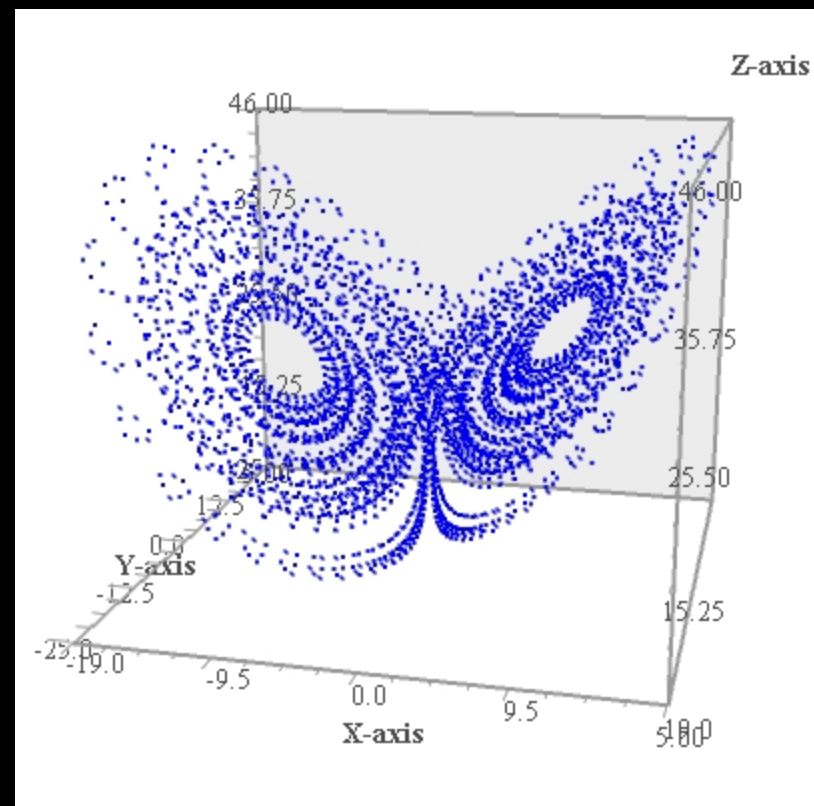

In [1324]:
def lorenz(xyz, parameter):
    o, r, b = parameter
    x, y, z = xyz
    x_dot = o*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0.0, 1.0, 1.05)

import plotly.express as px

parameter_sets = [
    (10, 28, 8/3),
    (10, 10, 8/3),
    (10, 14, 8/3),
    (10, 35.6, 8/3)
]

for parameter in parameter_sets:
   for i in range(num_steps):
      xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], parameter) * dt
   x_vals = xyzs[:, 0]
   y_vals = xyzs[:, 1]
   z_vals = xyzs[:, 2]

   fig = px.line_3d(x=x_vals, y=y_vals, z=z_vals)
   fig.show()

## Висновок
1. (10, 28, 8/3) класичні параметри. Форма метелика.
2. (10, 10, 8/3) періодичні (відсутній хаос)
3. (10, 14, 8/3) на межі стабільності тут помітно викид і початок 2 крила
4. (10, 35.6, 8/3) маєже то саме що в 1